IMPORT DATA

In [2]:
!!pip install psycopg2
!!pip install pandas
!!pip install matplotlib
!!pip install seaborn

['Requirement already satisfied: seaborn in /Users/da_m1_52/anaconda3/lib/python3.10/site-packages (0.12.2)',
 'Requirement already satisfied: matplotlib!=3.6.1,>=3.1 in /Users/da_m1_52/anaconda3/lib/python3.10/site-packages (from seaborn) (3.7.0)',
 'Requirement already satisfied: numpy!=1.24.0,>=1.17 in /Users/da_m1_52/anaconda3/lib/python3.10/site-packages (from seaborn) (1.23.5)',
 'Requirement already satisfied: pandas>=0.25 in /Users/da_m1_52/anaconda3/lib/python3.10/site-packages (from seaborn) (1.5.3)',
 'Requirement already satisfied: fonttools>=4.22.0 in /Users/da_m1_52/anaconda3/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (4.25.0)',
 'Requirement already satisfied: contourpy>=1.0.1 in /Users/da_m1_52/anaconda3/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (1.0.5)',
 'Requirement already satisfied: pillow>=6.2.0 in /Users/da_m1_52/anaconda3/lib/python3.10/site-packages (from matplotlib!=3.6.1,>=3.1->seaborn) (9.4.0)',
 'Requirem

In [3]:
#import packags, functions and classes
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from folium.plugins import FastMarkerCluster
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt


CONVERTING  CSV FILE TO TABLE

In [4]:
vendors = pd.read_csv('/Users/da_m1_52/Downloads/Vendors.csv')
orders = pd.read_csv('/Users/da_m1_52/Downloads/orders.csv')
train_locations = pd.read_csv('/Users/da_m1_52/Downloads/train_locations.csv')
train_customers= pd.read_csv('/Users/da_m1_52/Downloads/train_customers.csv')
test_locations = pd.read_csv('/Users/da_m1_52/Downloads/test_locations.csv')
test_customers= pd.read_csv('/Users/da_m1_52/Downloads/test_customers.csv')
FinalDT= pd.read_csv('/Users/da_m1_52/Downloads/FinalDT.csv')

/var/folders/5g/55_x_kdn3fx9kqydvjsl9qwr0000gn/T/ipykernel_2770/1785637164.py:2: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  orders = pd.read_csv('/Users/da_m1_52/Downloads/orders.csv')


In [104]:
test_locations['test'] == "x"

0        True
1        True
2        True
3        True
4        True
         ... 
16715    True
16716    True
16717    True
16718    True
16719    True
Name: test, Length: 16720, dtype: bool

In [88]:
vendors['vendor_id'] = vendors['id']
vendors = vendors.drop(['id'], axis=1)

In [89]:
train_customers['customer_id'] = train_customers['akeed_customer_id']
train_customers = train_customers.drop(['akeed_customer_id'], axis=1)

# test_customers['customer_id'] = test_customers['akeed_customer_id']
# test_customers = test_customers.drop(['akeed_customer_id'], axis=1)

In [90]:
orders['location_number'] = orders['LOCATION_NUMBER']
orders = orders.drop(['LOCATION_NUMBER'], axis=1)

In [91]:
orders['location_type'] = orders['LOCATION_TYPE']
orders = orders.drop(['LOCATION_TYPE'], axis=1)

In [92]:
customers = pd.concat([test_customers,train_customers], axis=0)
customers

,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at,test,train,customer_id
0,ICE2DJP,Male,NaN,1,1,EN,2018-02-07 16:45:36,2018-02-07 16:45:36,x,NaN,NaN
1,FWNUI71,Male,NaN,1,1,EN,2018-03-22 20:11:47,2018-03-22 20:11:47,x,NaN,NaN
2,LRX7BCH,Male,NaN,1,1,EN,2018-04-17 20:01:15,2018-04-17 20:01:15,x,NaN,NaN
3,D96DHMD,Male,NaN,1,1,EN,2018-04-29 22:35:52,2018-04-29 22:35:52,x,NaN,NaN
4,88Q8Y5V,Male,1997.0,1,1,EN,2018-05-05 12:38:09,2018-05-05 12:38:09,x,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34669,NaN,NaN,NaN,1,1,NaN,2020-03-03 13:01:13,2020-03-03 13:02:21,NaN,y,JAI79PE
34670,NaN,NaN,NaN,1,1,NaN,2020-03-03 13:22:35,2020-03-03 13:22:41,NaN,y,TR75VFL
34671,NaN,NaN,NaN,1,1,NaN,2020-03-03 13:24:27,2020-03-03 13:24:44,NaN,y,SQMJ08H
34672,NaN,NaN,NaN,1,1,NaN,2020-03-03 13:24:28,2020-03-03 13:28:00,NaN,y,9LW9CHN


In [93]:
locations = pd.concat([test_locations,train_locations], axis=0)
locations

,customer_id,location_number,location_type,latitude,longitude,test,train
0,Z59FTQD,0,NaN,126.032278,-9.106019,x,NaN
1,0JP29SK,0,Home,0.278709,-78.623847,x,NaN
2,0JP29SK,1,Home,0.124485,-78.605621,x,NaN
3,0JP29SK,2,NaN,-0.113891,-78.577449,x,NaN
4,0JP29SK,3,NaN,-0.848796,0.136726,x,NaN
...,...,...,...,...,...,...,...
59498,9PP42SA,2,NaN,-0.788515,-78.497721,NaN,y
59499,9PP42SA,3,Home,-1.445114,0.072558,NaN,y
59500,9PP42SA,4,NaN,-0.001785,0.431695,NaN,y
59501,HWELAU8,0,NaN,-0.066291,-78.583075,NaN,y


In [18]:
orders.shape

(135303, 26)

In [19]:
train_locations.shape

(59503, 5)

In [20]:
train_customers.shape

(34674, 8)

In [55]:
test_locations.head()

,customer_id,location_number,location_type,latitude,longitude,test
0,Z59FTQD,0,NaN,126.032278,-9.106019,1
1,0JP29SK,0,Home,0.278709,-78.623847,1
2,0JP29SK,1,Home,0.124485,-78.605621,1
3,0JP29SK,2,NaN,-0.113891,-78.577449,1
4,0JP29SK,3,NaN,-0.848796,0.136726,1


In [ ]:
test_customers.head()

In [56]:
Ven_Order_merge = pd.merge(vendors, orders, on=['vendor_id'])
Ven_Order_TrainL_merge= pd.merge(Ven_Order_merge, train_locations, on=['customer_id'])
Ven_Order_TrainL_TrainC_merge = pd.merge(Ven_Order_TrainL_merge, train_customers, on=['customer_id'])
Ven_Order_TrainL_TrainC_merge 

In [115]:
Ven_Order_merge1 = pd.merge(vendors, orders, on=['vendor_id'])
Ven_Order_TrainL_merge1= pd.merge(Ven_Order_merge1, locations, on=['customer_id'])
Ven_Order_TrainL_TrainC_merge1 = pd.merge(Ven_Order_TrainL_merge1, customers, on=['customer_id'])
Ven_Order_TrainL_TrainC_merge1 


,authentication_id,latitude_x,longitude_x,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,prepration_time,commission,is_akeed_delivering,discount_percentage,status_x,verified_x,rank,language_x,vendor_rating_x,sunday_from_time1,sunday_to_time1,sunday_from_time2,sunday_to_time2,monday_from_time1,monday_to_time1,monday_from_time2,monday_to_time2,tuesday_from_time1,tuesday_to_time1,tuesday_from_time2,tuesday_to_time2,wednesday_from_time1,wednesday_to_time1,wednesday_from_time2,wednesday_to_time2,thursday_from_time1,thursday_to_time1,thursday_from_time2,thursday_to_time2,friday_from_time1,friday_to_time1,friday_from_time2,friday_to_time2,saturday_from_time1,saturday_to_time1,saturday_from_time2,saturday_to_time2,primary_tags,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at_x,updated_at_x,device_type,display_orders,vendor_id,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,vendor_rating_y,driver_rating,deliverydistance,preparationtime,delivery_time,order_accepted_time,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,created_at_y,CID X LOC_NUM X VENDOR,location_number_x,location_type_x,location_number_y,location_type_y,latitude_y,longitude_y,test_x,train_x,akeed_customer_id,gender,dob,status_y,verified_y,language_y,created_at,updated_at_y,test_y,train_y
0,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,15,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1,4,163267.0,TBOTOCJ,1.0,7.3,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,2019-08-01 06:11:15,TBOTOCJ X 0 X 4,0,Home,0,Home,-0.603303,-78.519610,NaN,y,NaN,NaN,NaN,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48,NaN,y
1,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,15,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1,4,163267.0,TBOTOCJ,1.0,7.3,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,2019-08-01 06:11:15,TBOTOCJ X 0 X 4,0,Home,1,NaN,-0.603823,0.752779,NaN,y,NaN,NaN,NaN,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48,NaN,y
2,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,15,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,00:00:00,00:30:00,10:00:00,23:59:00,"{""primary_tags"":""4""}",1.0,"2,4,5,8,91,22,12,24,16,23","Arabic,Breakfast,Burgers,Desserts,Free Deliver...",Y,1.0,1.0,2018-01-30 14:42:04,2020-04-07 15:12:43,3,1,4,124595.0,TBOTOCJ,1.0,15.5,1,NaN,0.0,NaN,NaN,No,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-01 00:00:00,2019-06-01 13:57:14,TBOTOCJ X 0 X 4,0,Home,0,Home,-0.603303,-78.519610,NaN,y,NaN,NaN,NaN,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48,NaN,y
3,118597.0,-0.588596,0.754434,Restaurants,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,15,0.0,Yes,0.0,1.0,1,11,EN,4.4,00:00:00,00:30:00,08:00:00,23:59:00,00:00:00,00:30:00,08:00:00,23:5

In [ ]:
missing_perc = Ven_Order_TrainL_TrainC_merge.isna().sum() / Ven_Order_TrainL_TrainC_merge.shape[0] * 100

# Set pandas option to display all rows and columns
pd.set_option('display.max_columns', None)

# Display the missing percentages for all columns
print(missing_perc)

EDA CLEANING

In [31]:
#Checking for duplicates in our Dataset
duplicates = Ven_Order_TrainL_TrainC_merge.duplicated().sum()
duplicates

0

In [78]:
pd.set_option('display.max_columns', None)

# merge_data = Ven_Order_TrainL_TrainC_merge.isnull().sum()
# # merge_data

In [18]:
#Checking datatypes in our Dataset
Ven_Order_TrainL_TrainC_merge.dtypes

authentication_id                 float64
latitude_x                        float64
longitude_x                       float64
vendor_category_en                 object
vendor_category_id                float64
delivery_charge                   float64
serving_distance                  float64
is_open                           float64
OpeningTime                        object
OpeningTime2                       object
prepration_time                     int64
commission                        float64
is_akeed_delivering                object
discount_percentage               float64
status_x                          float64
verified_x                          int64
rank                                int64
language_x                         object
vendor_rating_x                   float64
sunday_from_time1                  object
sunday_to_time1                    object
sunday_from_time2                  object
sunday_to_time2                    object
monday_from_time1                 

DROPING  NON EFFECTIVE COLUMNS  

In [5]:
# columns_to_drop = ['dob', 'delivery_date']
# columns_to_drop_existing = [col for col in columns_to_drop if col in Ven_Order_TrainL_TrainC_merge.columns]

# if columns_to_drop_existing:
#    Ven_Order_TrainL_TrainC_merge.drop(columns_to_drop_existing, axis=1, inplace=True)
#    print("Columns dropped successfully.")
# else:
#   print("Columns not found in the DataFrame.")

# # Print the DataFrame after the potential dropping of the columns
# print(Ven_Order_TrainL_TrainC_merge)


# columns_to_drop = ['saturday_to_time2', 'saturday_from_time2', 'friday_to_time2', 'friday_from_time2']
# Ven_Order_TrainL_TrainC_merge.drop(columns_to_drop, axis=1, inplace=True)

# # Print the DataFrame after dropping the columns
# print(Ven_Order_TrainL_TrainC_merge)


# columns_to_drop = ['thursday_from_time2', 'thursday_to_time2', 'wednesday_from_time2', 'wednesday_to_time2']
# Ven_Order_TrainL_TrainC_merge.drop(columns_to_drop, axis=1, inplace=True)

# # Print the DataFrame after dropping the columns
# print(Ven_Order_TrainL_TrainC_merge)

# columns_to_drop = ['tuesday_from_time2', 'tuesday_to_time2', 'monday_from_time2', 'monday_to_time2']
# Ven_Order_TrainL_TrainC_merge.drop(columns_to_drop, axis=1, inplace=True)

# # Print the DataFrame after dropping the columns
# print(Ven_Order_TrainL_TrainC_merge)

# columns_to_drop = ['sunday_from_time2', 'sunday_to_time2']
# Ven_Order_TrainL_TrainC_merge.drop(columns_to_drop, axis=1, inplace=True)

# # Print the DataFrame after dropping the columns
# print(Ven_Order_TrainL_TrainC_merge)



# columns_to_drop = ['vendor_rating_y', 'promo_code_discount_percentage', 'promo_code']
# Ven_Order_TrainL_TrainC_merge.drop(columns_to_drop, axis=1, inplace=True)
 
# #   Print the DataFrame after dropping the columns
# print(Ven_Order_TrainL_TrainC_merge)

# columns_to_drop = ['delivery_time', 'driver_accepted_time']
# Ven_Order_TrainL_TrainC_merge.drop(columns_to_drop, axis=1, inplace=True)

# # Print the DataFrame after dropping the columns
# print(Ven_Order_TrainL_TrainC_merge)

# columns_to_drop = ['OpeningTime2',]
# Ven_Order_TrainL_TrainC_merge.drop(columns_to_drop, axis=1, inplace=True)

# print(Ven_Order_TrainL_TrainC_merge)


columns_to_drop = ['latitude_y','longitude_y']
FinalDT.drop(columns_to_drop, axis=1, inplace=True)

print(FinalDT)

columns_to_drop = ['language_y']
FinalDT.drop(columns_to_drop, axis=1, inplace=True)

print(FinalDT)



        authentication_id  latitude_x  longitude_x  vendor_category_en  \
0                118597.0   -0.588596     0.754434                   0   
1                118597.0   -0.588596     0.754434                   0   
2                118597.0   -0.588596     0.754434                   0   
3                118597.0   -0.588596     0.754434                   0   
4                118786.0   -0.405660     0.644401                   0   
...                   ...         ...          ...                 ...   
385800           132953.0   13.335131    -1.449556                   0   
385801           132953.0   13.335131    -1.449556                   0   
385802           132953.0   13.335131    -1.449556                   0   
385803           132953.0   13.335131    -1.449556                   0   
385804           132953.0   13.335131    -1.449556                   0   

        vendor_category_id  delivery_charge  serving_distance  is_open  \
0                      2.0           

In [33]:
# Calculate the mode for all columns
mode_values = Ven_Order_TrainL_TrainC_merge.mode().iloc[0]

# Fill missing values in each column using its corresponding mode value
Ven_Order_TrainL_TrainC_merge.fillna(mode_values, inplace=True)

In [34]:
null_counts = Ven_Order_TrainL_TrainC_merge.isnull().sum()
print(null_counts)

authentication_id     0
latitude_x            0
longitude_x           0
vendor_category_en    0
vendor_category_id    0
                     ..
status_y              0
verified_y            0
language_y            0
created_at            0
updated_at_y          0
Length: 74, dtype: int64


In [40]:
Ven_Order_TrainL_TrainC_merge

,authentication_id,latitude_x,longitude_x,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,prepration_time,...,location_number_y,location_type_y,latitude_y,longitude_y,gender,status_y,verified_y,language_y,created_at,updated_at_y
0,118597.0,-0.588596,0.754434,0,2.0,0.0,6.0,1.0,11:00AM-11:30PM,15,...,0,0,-0.603303,-78.519610,6,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
1,118597.0,-0.588596,0.754434,0,2.0,0.0,6.0,1.0,11:00AM-11:30PM,15,...,1,0,-0.603823,0.752779,6,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
2,118597.0,-0.588596,0.754434,0,2.0,0.0,6.0,1.0,11:00AM-11:30PM,15,...,0,0,-0.603303,-78.519610,6,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
3,118597.0,-0.588596,0.754434,0,2.0,0.0,6.0,1.0,11:00AM-11:30PM,15,...,1,0,-0.603823,0.752779,6,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
4,118786.0,-0.405660,0.644401,0,2.0,0.7,8.0,1.0,11:59AM-10:45PM,14,...,0,0,-0.603303,-78.519610,6,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385800,132953.0,13.335131,-1.449556,0,2.0,0.7,12.0,1.0,11:00AM-11:00PM,20,...,0,0,12.452181,-1.444149,6,1,1,EN,2020-02-05 22:20:58,2020-02-05 22:21:40
385801,132953.0,13.335131,-1.449556,0,2.0,0.7,12.0,1.0,11:00AM-11:00PM,20,...,0,0,14.521414,-1.406357,6,1,1,EN,2020-03-02 20:12:13,2020-03-02 20:12:38
385802,132953.0,13.335131,-1.449556,0,2.0,0.7,12.0,1.0,11:00AM-11:00PM,20,...,0,0,13.315578,-1.383475,6,1,1,EN,2020-02-04 20:42:16,2020-02-04 20:44:30
385803,132953.0,13.335131,-1.449556,0,2.0,0.7,12.0,1.0,11:00AM-11:00PM,20,...,0,0,13.349885,-1.386949,6,1,1,EN,2020-03-03 04:23:00,2020-03-03 04:23:26


In [43]:
#convert to csv file
Ven_Order_TrainL_TrainC_merge.to_csv("FinalDT.csv",index=False)

In [36]:
#LabelEncoder to be able feed the model 
le = LabelEncoder()
le.fit(Ven_Order_TrainL_TrainC_merge["vendor_category_en"])
Ven_Order_TrainL_TrainC_merge["vendor_category_en"] = le.transform(Ven_Order_TrainL_TrainC_merge["vendor_category_en"])

le = LabelEncoder()
le = LabelEncoder()
le.fit(Ven_Order_TrainL_TrainC_merge["is_akeed_delivering"])
Ven_Order_TrainL_TrainC_merge["is_akeed_delivering"] = le.transform(Ven_Order_TrainL_TrainC_merge["is_akeed_delivering"])
le = LabelEncoder()


le = LabelEncoder()
le = LabelEncoder()
le.fit(Ven_Order_TrainL_TrainC_merge["is_rated"])
Ven_Order_TrainL_TrainC_merge["is_rated"] = le.transform(Ven_Order_TrainL_TrainC_merge["is_rated"])
le = LabelEncoder()

le = LabelEncoder()
le = LabelEncoder()
le.fit(Ven_Order_TrainL_TrainC_merge["location_type_x"])
Ven_Order_TrainL_TrainC_merge["location_type_x"] = le.transform(Ven_Order_TrainL_TrainC_merge["location_type_x"])
le = LabelEncoder()

le = LabelEncoder()
le = LabelEncoder()
le.fit(Ven_Order_TrainL_TrainC_merge["location_type_y"])
Ven_Order_TrainL_TrainC_merge["location_type_y"] = le.transform(Ven_Order_TrainL_TrainC_merge["location_type_y"])
le = LabelEncoder()
	
le = LabelEncoder()
le = LabelEncoder()
le.fit(Ven_Order_TrainL_TrainC_merge["one_click_vendor"])
Ven_Order_TrainL_TrainC_merge["one_click_vendor"] = le.transform(Ven_Order_TrainL_TrainC_merge["one_click_vendor"])
le = LabelEncoder()



le = LabelEncoder()
le = LabelEncoder()
le.fit(Ven_Order_TrainL_TrainC_merge["gender"])
Ven_Order_TrainL_TrainC_merge["gender"] = le.transform(Ven_Order_TrainL_TrainC_merge["gender"])
le = LabelEncoder()





In [ ]:
pd.set_option('display.max_columns', None)
# Display the entire DataFrame
Ven_Order_TrainL_TrainC_merge

In [64]:

le = LabelEncoder()
le = LabelEncoder()
le.fit(FinalDT["CID X LOC_NUM X VENDOR"])
FinalDT["CID X LOC_NUM X VENDOR"] = le.transform(FinalDT["CID X LOC_NUM X VENDOR"])
le = LabelEncoder()

In [54]:
Ven_Order_TrainL_TrainC_merge.columns

Index(['authentication_id', 'latitude_x', 'longitude_x', 'vendor_category_en',
       'vendor_category_id', 'delivery_charge', 'serving_distance', 'is_open',
       'OpeningTime', 'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status_x', 'verified_x', 'rank', 'language_x',
       'vendor_rating_x', 'sunday_from_time1', 'sunday_to_time1',
       'monday_from_time1', 'monday_to_time1', 'tuesday_from_time1',
       'tuesday_to_time1', 'wednesday_from_time1', 'wednesday_to_time1',
       'thursday_from_time1', 'thursday_to_time1', 'friday_from_time1',
       'friday_to_time1', 'saturday_from_time1', 'saturday_to_time1',
       'primary_tags', 'open_close_flags', 'vendor_tag', 'vendor_tag_name',
       'one_click_vendor', 'country_id', 'city_id', 'created_at_x',
       'updated_at_x', 'device_type', 'display_orders', 'vendor_id',
       'akeed_order_id', 'customer_id', 'item_count', 'grand_total',
       'payment_mode', 'vendor_discount_amount', 'is_f

In [37]:
Ven_Order_TrainL_TrainC_merge

,authentication_id,latitude_x,longitude_x,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,OpeningTime2,...,location_number_y,location_type_y,latitude_y,longitude_y,gender,status_y,verified_y,language_y,created_at,updated_at_y
0,118597.0,-0.588596,0.754434,0,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,...,0,0,-0.603303,-78.519610,6,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
1,118597.0,-0.588596,0.754434,0,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,...,1,0,-0.603823,0.752779,6,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
2,118597.0,-0.588596,0.754434,0,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,...,0,0,-0.603303,-78.519610,6,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
3,118597.0,-0.588596,0.754434,0,2.0,0.0,6.0,1.0,11:00AM-11:30PM,-,...,1,0,-0.603823,0.752779,6,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
4,118786.0,-0.405660,0.644401,0,2.0,0.7,8.0,1.0,11:59AM-10:45PM,-,...,0,0,-0.603303,-78.519610,6,1,1,EN,2019-06-12 21:14:01,2019-10-01 18:45:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385800,132953.0,13.335131,-1.449556,0,2.0,0.7,12.0,1.0,11:00AM-11:00PM,-,...,0,0,12.452181,-1.444149,6,1,1,EN,2020-02-05 22:20:58,2020-02-05 22:21:40
385801,132953.0,13.335131,-1.449556,0,2.0,0.7,12.0,1.0,11:00AM-11:00PM,-,...,0,0,14.521414,-1.406357,6,1,1,EN,2020-03-02 20:12:13,2020-03-02 20:12:38
385802,132953.0,13.335131,-1.449556,0,2.0,0.7,12.0,1.0,11:00AM-11:00PM,-,...,0,0,13.315578,-1.383475,6,1,1,EN,2020-02-04 20:42:16,2020-02-04 20:44:30
385803,132953.0,13.335131,-1.449556,0,2.0,0.7,12.0,1.0,11:00AM-11:00PM,-,...,0,0,13.349885,-1.386949,6,1,1,EN,2020-03-03 04:23:00,2020-03-03 04:23:26


 STATISTICS

In [70]:
pd.set_option('display.max_columns', None)


In [6]:
FinalDT

,authentication_id,latitude_x,longitude_x,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,prepration_time,...,CID X LOC_NUM X VENDOR,location_number_x,location_type_x,location_number_y,location_type_y,gender,status_y,verified_y,created_at,updated_at_y
0,118597.0,-0.588596,0.754434,0,2.0,0.0,6.0,1.0,11:00AM-11:30PM,15,...,TBOTOCJ X 0 X 4,0,0,0,0,6,1,1,2019-06-12 21:14:01,2019-10-01 18:45:48
1,118597.0,-0.588596,0.754434,0,2.0,0.0,6.0,1.0,11:00AM-11:30PM,15,...,TBOTOCJ X 0 X 4,0,0,1,0,6,1,1,2019-06-12 21:14:01,2019-10-01 18:45:48
2,118597.0,-0.588596,0.754434,0,2.0,0.0,6.0,1.0,11:00AM-11:30PM,15,...,TBOTOCJ X 0 X 4,0,0,0,0,6,1,1,2019-06-12 21:14:01,2019-10-01 18:45:48
3,118597.0,-0.588596,0.754434,0,2.0,0.0,6.0,1.0,11:00AM-11:30PM,15,...,TBOTOCJ X 0 X 4,0,0,1,0,6,1,1,2019-06-12 21:14:01,2019-10-01 18:45:48
4,118786.0,-0.405660,0.644401,0,2.0,0.7,8.0,1.0,11:59AM-10:45PM,14,...,TBOTOCJ X 0 X 188,0,0,0,0,6,1,1,2019-06-12 21:14:01,2019-10-01 18:45:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385800,132953.0,13.335131,-1.449556,0,2.0,0.7,12.0,1.0,11:00AM-11:00PM,20,...,6PY2OK5 X 0 X 907,0,0,0,0,6,1,1,2020-02-05 22:20:58,2020-02-05 22:21:40
385801,132953.0,13.335131,-1.449556,0,2.0,0.7,12.0,1.0,11:00AM-11:00PM,20,...,UPNI9BV X 0 X 907,0,0,0,0,6,1,1,2020-03-02 20:12:13,2020-03-02 20:12:38
385802,132953.0,13.335131,-1.449556,0,2.0,0.7,12.0,1.0,11:00AM-11:00PM,20,...,U6PTUT5 X 0 X 907,0,0,0,0,6,1,1,2020-02-04 20:42:16,2020-02-04 20:44:30
385803,132953.0,13.335131,-1.449556,0,2.0,0.7,12.0,1.0,11:00AM-11:00PM,20,...,MSEGQHZ X 0 X 907,0,0,0,0,6,1,1,2020-03-03 04:23:00,2020-03-03 04:23:26


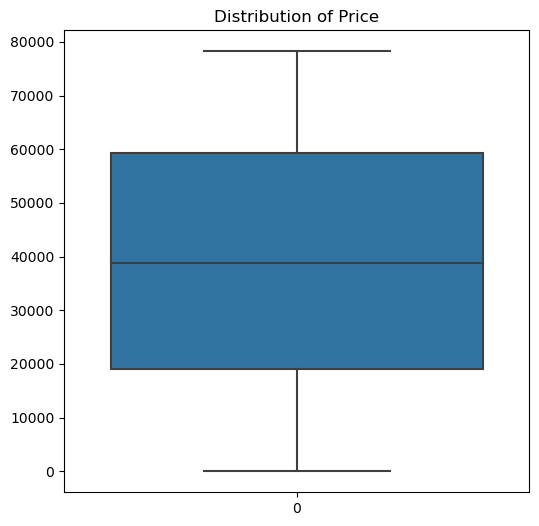

In [66]:
plt.figure(figsize=(6,6))
sns.boxplot(FinalDT['CID X LOC_NUM X VENDOR'])
plt.title("Distribution of CID X LOC_NUM X VENDOR' ")
plt.show()

In [67]:
Q1 = FinalDT['CID X LOC_NUM X VENDOR'].quantile(0.25)
Q3 = FinalDT['CID X LOC_NUM X VENDOR'].quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 40105.0


Text(0, 0.5, 'CID X LOC_NUM X VENDOR')

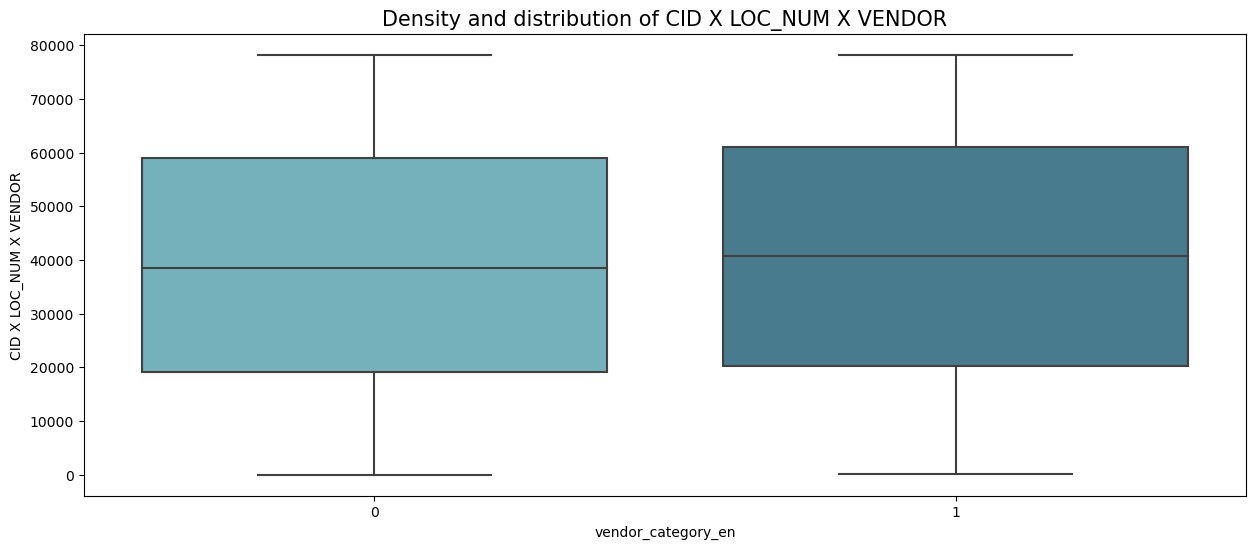

In [69]:
plt.figure(figsize=(15,6))
sns.boxplot(data=FinalDT, x='vendor_category_en', y='CID X LOC_NUM X VENDOR', palette='GnBu_d')
plt.title('Density and distribution of CID X LOC_NUM X VENDOR' , fontsize=15)
plt.xlabel('vendor_category_en')
plt.ylabel("CID X LOC_NUM X VENDOR")